# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [5]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [6]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Boarding at Mumbai was chaot...
1,"Not Verified | Mexico City Airport is a zoo, b..."
2,"✅ Trip Verified | Very poor service, very fru..."
3,Not Verified | Generally poor. Sent to gate o...
4,Not Verified | BA changed our prepaid seats a...


In [7]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
df

,reviews
0,✅ Trip Verified | Boarding at Mumbai was chaot...
1,"Not Verified | Mexico City Airport is a zoo, b..."
2,"✅ Trip Verified | Very poor service, very fru..."
3,Not Verified | Generally poor. Sent to gate o...
4,Not Verified | BA changed our prepaid seats a...
...,...
995,✅ Trip Verified | Our original flight was can...
996,✅ Trip Verified | Hong Kong to London. This w...
997,✅ Trip Verified | Washington to Bucharest ret...
998,✅ Trip Verified | London to Warsaw. BA Europe...


In [9]:
# Removing the Sentences before '|' in the reviews column

df.reviews= df.reviews.str.split('|',expand=True)[1]

In [10]:
df

,reviews
0,Boarding at Mumbai was chaotic and badly orga...
1,"Mexico City Airport is a zoo, but taking the ..."
2,"Very poor service, very frustrating. Firstly..."
3,"Generally poor. Sent to gate on time, sat ma..."
4,BA changed our prepaid seats at the last min...
...,...
995,Our original flight was cancelled as my wife...
996,Hong Kong to London. This was my first Busin...
997,Washington to Bucharest return via London. I...
998,London to Warsaw. BA European service is bec...


S1:- Cleaning the text

In [11]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...


In [17]:
'''This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.'''

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
'''The NLTK corpus is a massive dump of all kinds of natural language data sets that are definitely worth taking a look at.'''

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba..."
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n..."
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F..."
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ..."
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ..."


In [19]:
'''Obtaining the stem words – Lemmatization'''

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...


In [20]:
df[['reviews','Lemma']]

,reviews,Lemma
0,Boarding at Mumbai was chaotic and badly orga...,Boarding Mumbai chaotic badly organise board...
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport zoo take late departure ...
2,"Very poor service, very frustrating. Firstly...",poor service frustrating Firstly flight LHR ...
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent gate time sat maybe minu...
4,BA changed our prepaid seats at the last min...,BA change prepaid seat last minute charge us...
...,...,...
995,Our original flight was cancelled as my wife...,original flight cancel wife disembark cruise...
996,Hong Kong to London. This was my first Busin...,Hong Kong London first Business Class trip B...
997,Washington to Bucharest return via London. I...,Washington Bucharest return via London origi...
998,London to Warsaw. BA European service is bec...,London Warsaw BA European service become lik...


Sentiment Analysis using VADER
Means Valence Aware Dictionary for Sentiment Reasoning

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,Boarding at Mumbai was chaotic and badly orga...,Boarding at Mumbai was chaotic and badly orga...,"[(Boarding, v), (Mumbai, n), (chaotic, a), (ba...",Boarding Mumbai chaotic badly organise board...,0.9871,Positive
1,"Mexico City Airport is a zoo, but taking the ...",Mexico City Airport is a zoo but taking the l...,"[(Mexico, n), (City, n), (Airport, n), (zoo, n...",Mexico City Airport zoo take late departure ...,0.9920,Positive
2,"Very poor service, very frustrating. Firstly...",Very poor service very frustrating Firstly my...,"[(poor, a), (service, n), (frustrating, a), (F...",poor service frustrating Firstly flight LHR ...,-0.9403,Negative
3,"Generally poor. Sent to gate on time, sat ma...",Generally poor Sent to gate on time sat maybe...,"[(Generally, r), (poor, a), (Sent, n), (gate, ...",Generally poor Sent gate time sat maybe minu...,-0.4588,Negative
4,BA changed our prepaid seats at the last min...,BA changed our prepaid seats at the last minu...,"[(BA, n), (changed, v), (prepaid, n), (seats, ...",BA change prepaid seat last minute charge us...,0.6908,Positive


In [24]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    528
Negative    367
Neutral     105
Name: Analysis, dtype: int64

Visual Representation Using Matplotlib

([<matplotlib.patches.Wedge at 0x18e46da0700>,
 [Text(-0.09663630635705894, 1.0957469709260732, 'Positive'),
  Text(-0.26350529924854643, -1.0679723579137872, 'Negative'),
  Text(1.2772152593917465, -0.43728844162277347, 'Neutral')],
 [Text(-0.05271071255839579, 0.5976801659596762, '52.8%'),
  Text(-0.14373016322647986, -0.5825303770438838, '36.7%'),
  Text(0.8041725707281367, -0.27532975954026473, '10.5%')])

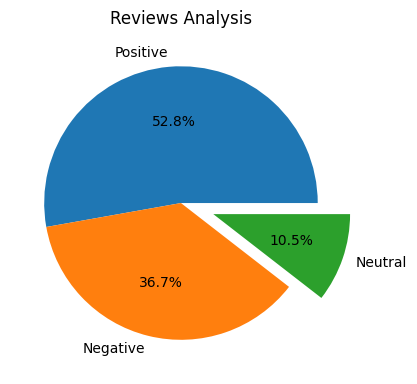

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

In [26]:
df.to_csv("BA_reviews.csv")

Visualization using WordCloud

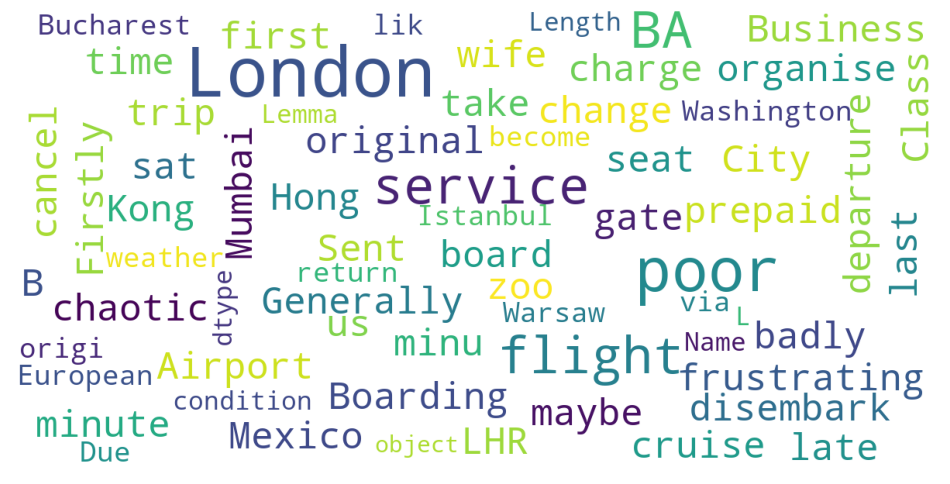

In [29]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)